   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


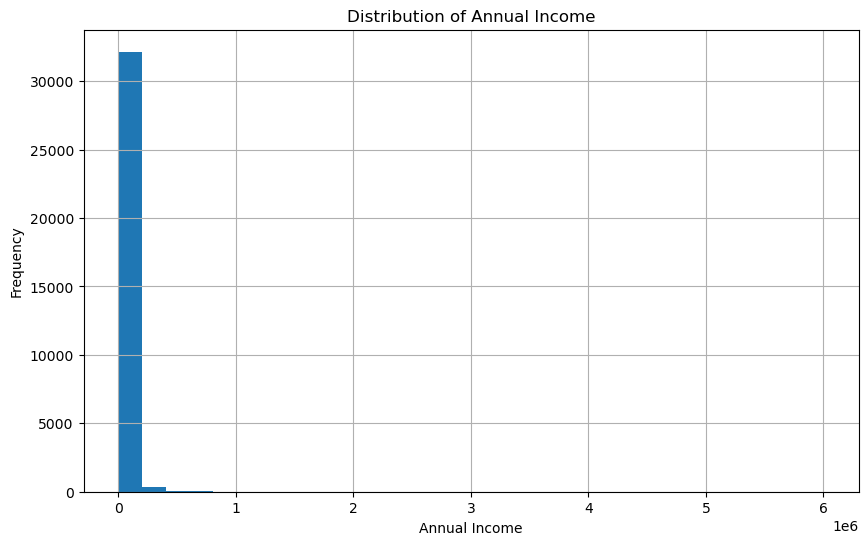

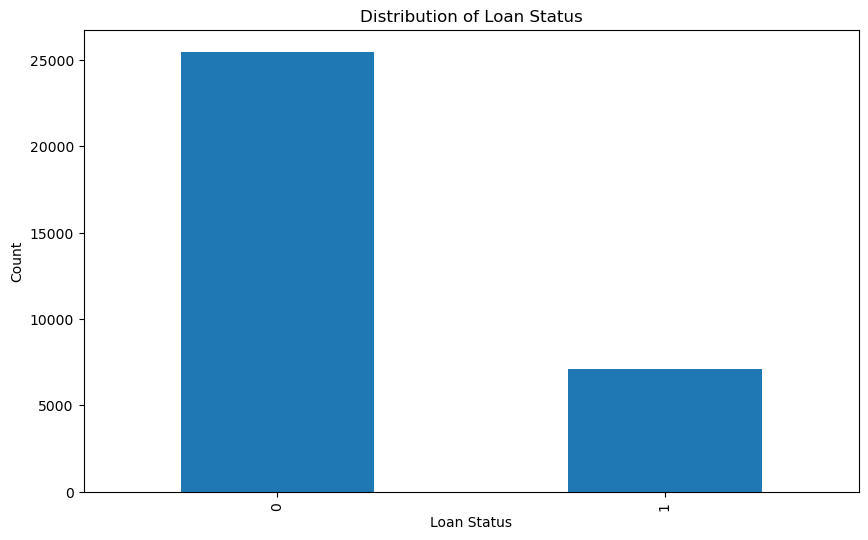

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r'Desktop/dsai/assignments/credit risk management/archive/credit_risk_dataset.csv')
print(df.head())

# Get information about the dataset
print(df.info())
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)
print(df[numerical_columns].describe())

#  Histogram
plt.figure(figsize=(10, 6))
df['person_income'].hist(bins=30)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

# Bar Chart
plt.figure(figsize=(10, 6))
df['loan_status'].value_counts().plot(kind='bar')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()





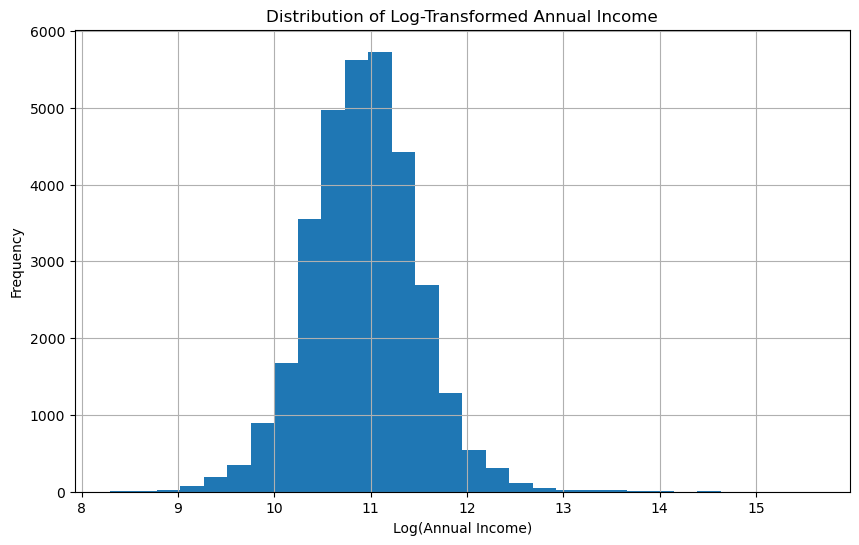

In [16]:
import numpy as np

#  log transformation to annual_income
df['log_annual_income'] = np.log1p(df['person_income'])  # log1p handles zero values safely

# Plot histogram for log-transformed income for better visualization
plt.figure(figsize=(10, 6))
df['log_annual_income'].hist(bins=30)
plt.title('Distribution of Log-Transformed Annual Income')
plt.xlabel('Log(Annual Income)')
plt.ylabel('Frequency')
plt.show()


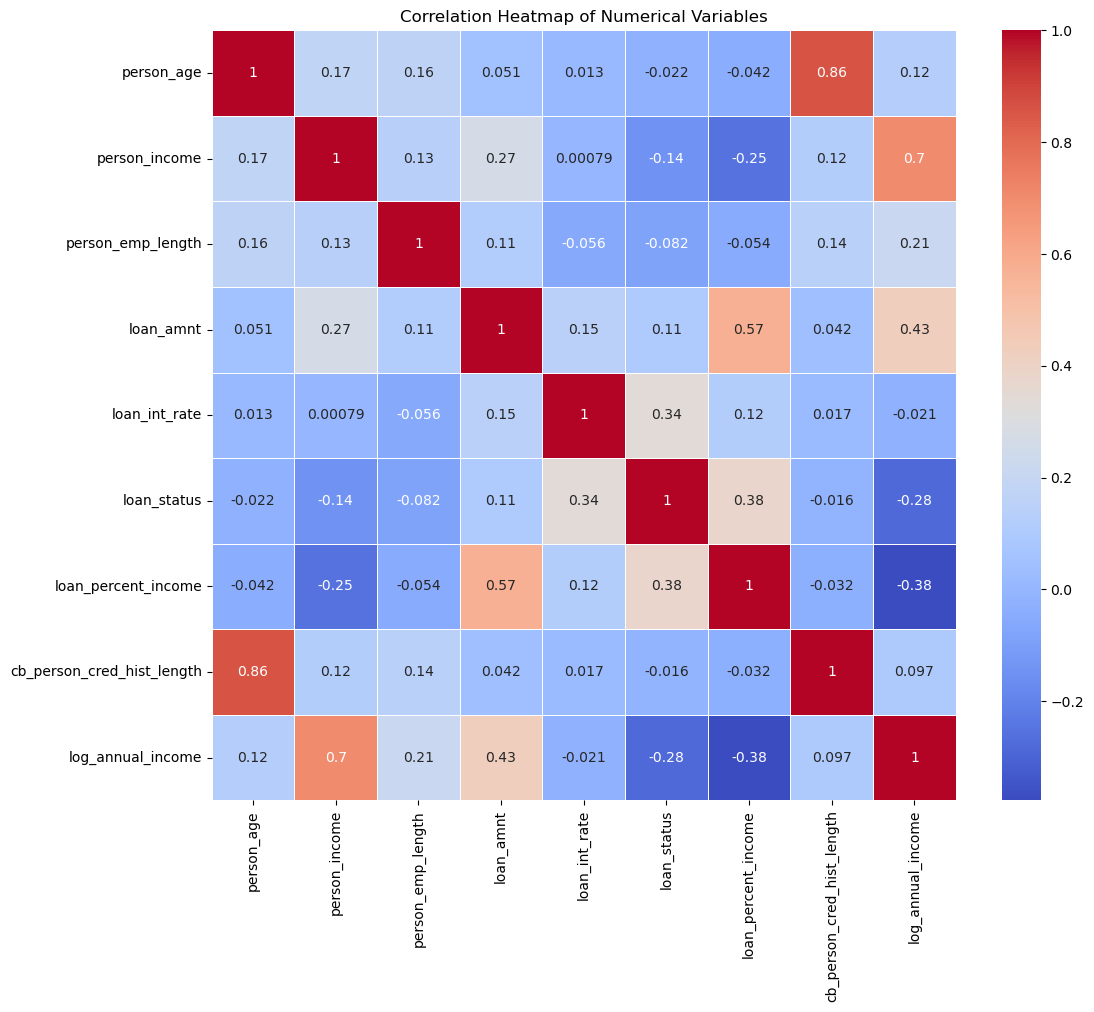

In [17]:
# Multivariate Analysis: Correlation Heatmap
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()